In [ ]:
# Exploratory data analysis

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
data = pd.read_csv("Titanic-Dataset.csv", index_col = 'PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
data.isnull().sum()
#age -> 20% missed
#remove depends on the number of rows if no of data points is more than 1 lac then you can go with it (80,000 remaining rows)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
#check for outliers -> if not then use mean otherwise median
data['Mod_Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Mod_Age   891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [17]:
data[['Mod_Age','Age']]

,Mod_Age,Age
PassengerId,,
1,22.000000,22.0
2,38.000000,38.0
3,26.000000,26.0
4,35.000000,35.0
5,35.000000,35.0
...,...,...
887,27.000000,27.0
888,19.000000,19.0
889,29.699118,NaN


In [22]:
data = data.drop(columns=['Cabin'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Mod_Age
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
 10  Mod_Age   891 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.5+ KB


In [24]:
#removing two rows of Embarked which are null
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Mod_Age
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0


In [25]:
#ab Id ko leke drop kardo
#to get indice
data = data.drop(index = data[data['Embarked'].isnull()].index)
#no of rows changed from 891 to 889

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
 10  Mod_Age   889 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.3+ KB


In [ ]:
#to remove rows from data
#use df.drop(index=)
#to remove columns 
#use df.drop(columns=)


In [27]:
#accesing column in oandas
#data.loc[:,'']

In [28]:
#one hot encoding and label encoding 

In [ ]:
#Analysis Part


In [33]:
#ratio of male and female
data['Sex'].value_counts()/data.shape[0]

Sex
male      0.649044
female    0.350956
Name: count, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

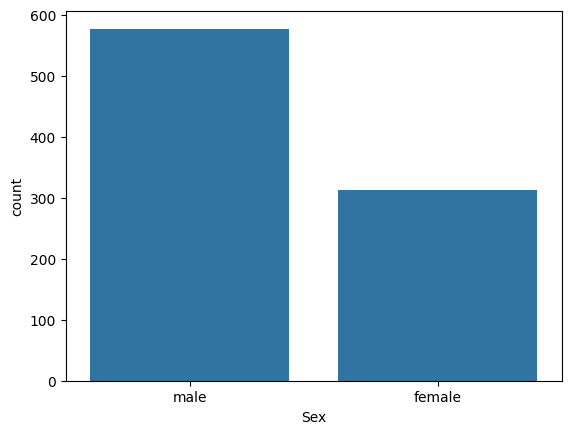

In [32]:
#ratio of male and female
sns.countplot(data, x= 'Sex')

<Axes: xlabel='Sex', ylabel='count'>

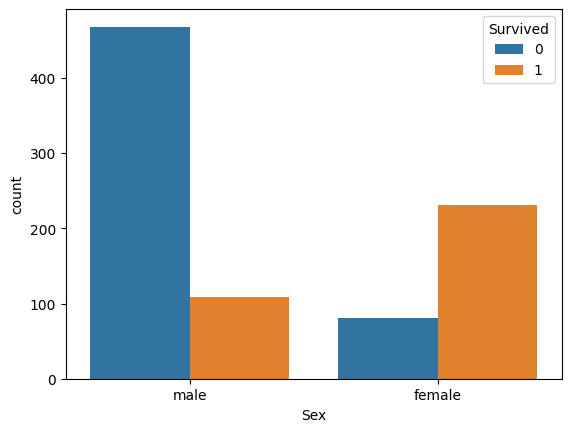

In [35]:
#survived ke base par
sns.countplot(data, x='Sex', hue='Survived')

In [39]:
#survival aur sex ratio -> use fancy indexing
#groupby by sex -> split male and female -> male survived and female survived ratio
# split_sex= data.groupby('Sex')
# split_sex.first()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Mod_Age
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,38.0
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,22.0


In [41]:
gender_counts = data.value_counts('Sex')
gender_counts

Sex
male      577
female    312
Name: count, dtype: int64

In [43]:
data_men = data[data['Sex']=='male']
data_women = data[data['Sex']=='female']

In [44]:
data_men['Survived'].value_counts()/data_men.shape[0]

Survived
0    0.811092
1    0.188908
Name: count, dtype: float64

In [45]:
data_women['Survived'].value_counts()/data_women.shape[0]

Survived
1    0.740385
0    0.259615
Name: count, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

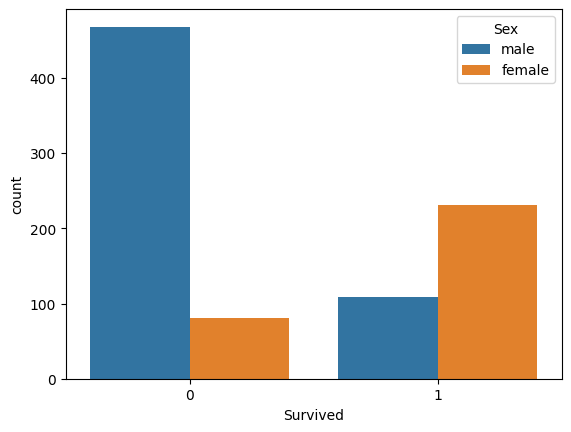

In [46]:
#survived ke basis par male and female ka ratio
sns.countplot(data, x='Survived', hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

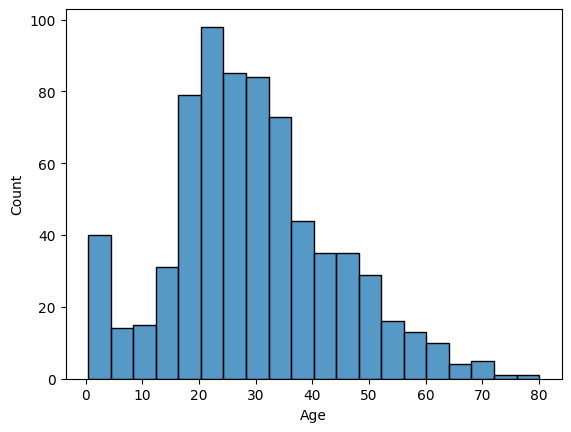

In [48]:
sns.histplot(data, x='Age') #177 values are neglected in the age column

<Axes: xlabel='Age', ylabel='Count'>

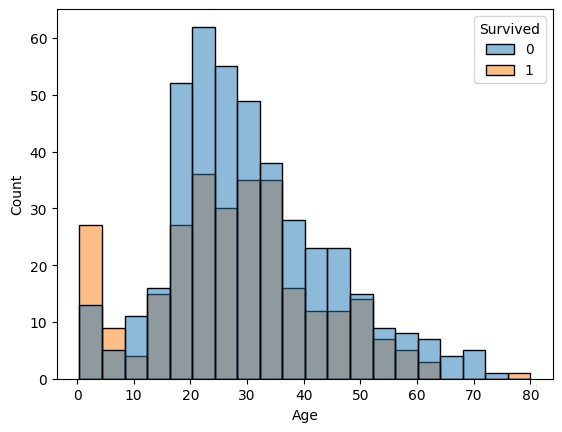

In [50]:
sns.histplot(data, x='Age', hue='Survived')
#children <10 were preferred more

In [51]:
#joint plot
sns.jointplot(data, x='age)

In [52]:
#median age of survived versus not survived

<Axes: xlabel='Survived', ylabel='Age'>

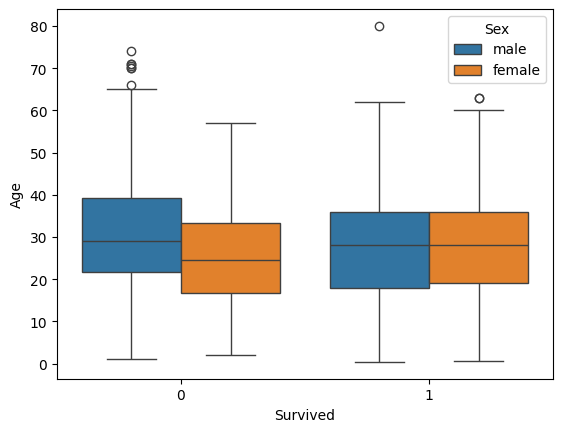

In [57]:
sns.boxplot(data, x='Survived', y='Age', hue= 'Sex')

In [ ]:
#how do survival rates vary across gender and passenger class


In [58]:
#survival ration while boarding alone ship or with someone


In [59]:
pd.crosstab(data['Embarked'], data['Pclass'], values=data['Survived'], aggfunc='mean')

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


In [63]:
data['Alone'] = (data['SibSp']+data['Parch']==0)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Mod_Age,Alone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,True


In [69]:
df= data.groupby('Alone')['Survived']
df.first()

Alone
False    0
True     1
Name: Survived, dtype: int64

In [71]:
df= data.groupby('Alone')['Survived'].mean()
df

Alone
False    0.505650
True     0.300935
Name: Survived, dtype: float64

In [72]:
#family size versus survival

<Axes: xlabel='family_size', ylabel='Survived'>

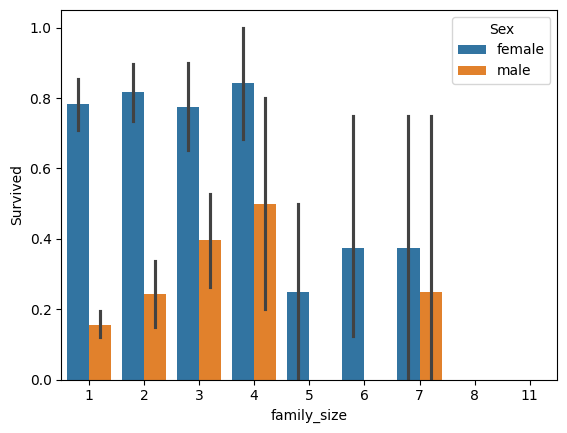

In [78]:
data['family_size']= data['SibSp'] + data['Parch'] + 1
data.head()
sns.barplot(data, x='family_size', y='Survived', hue='Sex')

<Axes: xlabel='Fare', ylabel='Survived'>

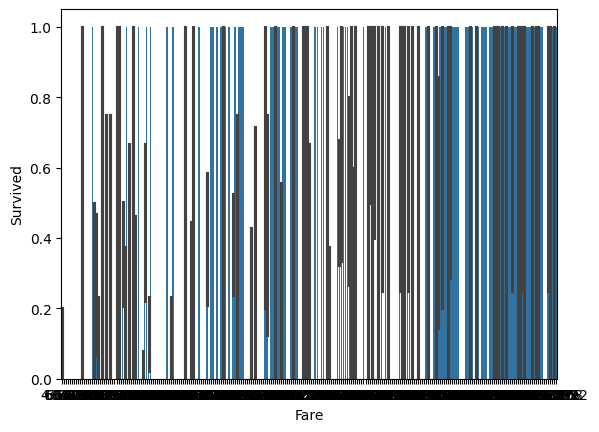

In [79]:
#ticket fair and survival
sns.barplot(data, x='Fare', y='Survived')